In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read very carefully what you should submit in each task

In [3]:
# This tutorial will be about metrics in context of machine learning.
# Choosing wrong metric will ensure, that your ML project is failure, so choose wisely.

# Metric takes predictions and ground truth (called targets) and outputs (usually) one number.
# Note that metric does not have to differentiable (example is accuracy)
# Also metric should be understandable without having PhD in math 
# (that means that binary crossentropy is usually a bad metric).

## Absolute vs squared error

In [4]:
# Consider following two metrics, with example calculation below

def mean_squared_error(predictions, targets):
    return np.square(predictions - targets).mean()

def mean_absolute_error(predictions, targets):
    return np.abs(predictions - targets).mean()

predictions = np.array([0, 5])
targets = np.array([1, 7])
mean_squared_error(predictions, targets), mean_absolute_error(predictions, targets)

(2.5, 1.5)

Target vs predictions1


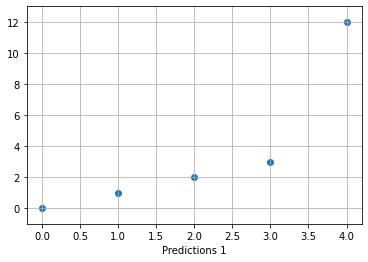

Target vs predictions2


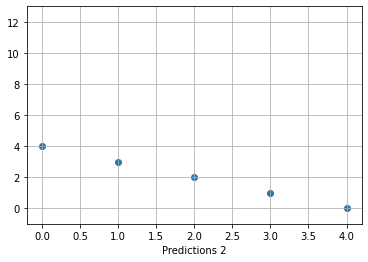

In [5]:
# Which one is better? That depends on the problem. 
# Consider following set of predictions and targets.

targets =      np.array([0,1,2,3,4])
predictions1 = np.array([0,1,2,3,12])
predictions2 = np.array([4,3,2,1,0])

print("Target vs predictions1")
plt.scatter(targets, predictions1)
plt.ylim(-1, 13)
plt.grid()
plt.xlabel("Targets")
plt.ylabel("Predictions 1")
plt.show()

print("Target vs predictions2")
plt.scatter(targets, predictions2)
plt.ylim(-1, 13)
plt.grid()
plt.xlabel("Targets")
plt.ylabel("Predictions 2")
plt.show()

In [6]:
# It seems that first set of prediction is either completelly correct, or off by a lot.
# Maybe it is some outlier in data or wrong data point.
# Second set of prediction has completelly opposite trend and does not look right.
# Let's look at metrics

print("Mean squared error (MSE)")
print("MSE for predictions 1", mean_squared_error(predictions1, targets))
print("MSE for predictions 2", mean_squared_error(predictions2, targets))
print("Mean absolute error (MAE)")
print("MAE for predictions 1", mean_absolute_error(predictions1, targets))
print("MAE for predictions 2", mean_absolute_error(predictions2, targets))

Mean squared error (MSE)
MSE for predictions 1 12.8
MSE for predictions 2 8.0
Mean absolute error (MAE)
MAE for predictions 1 1.6
MAE for predictions 2 2.4


In [7]:
# Now we see, that metrics rank our predictions differently. 
# Squared error like the second ones better.
# Absolute error prefers first one.
# This is not completelly good argument that one metric is better than second one,
# but demonstrates, that squared error is sensitive to outliers.

# Also it is better argument than just looking at the values. Any metric can be
# scaled by a constant, or counted in different units
# so comparing numerical output of two metrics is like comparing volts with meters 
# and basically meaningless.
# But we can still compare ability of metric to rank data in a meaningful way.

#### Task 1

In [8]:
# Task 1:
# You are predicting prices of flats.
# Your boss tells you, that nobody cares about small errors, but big errors are a problem.
# You also manually checked everything and there are no outliers.

# Which metric would you choose between square and absolute error?
# Provide justification and also demonstrate reason for your choice by constructing 
# some small dataset with multiple sets of predictions
# and comparing outputs of metrics.

## Custom metrics - task 2

In [9]:
# Keep in mind that you can also make a metric tailored to your usecase, 
# we will do this in the task below.

In [10]:
# Task 2:
# You are predicting prices of flats.
# Your boss made a new contract, which has following terms.
# For each prediction (for one flat):
# - If your prediction has error less (or equal) than 5%, than your company will earn 1000$
# - If your prediction has error more than 5%, your company pays 10000$ fine.

# Construct a custom metric for comparing models in this setting.
# Provide justification and also demonstrate reason for your choice by constructing 
# some small dataset with multiple sets of predictions
# and comparing outputs of metrics. Also demonstrate that your metric is better
# than selected metric from task 1.

## Metrics for binary classification

In [11]:
# Now we switch our focus to classification. 
# In all cases below the targets will be either 0 or 1.
# Also predictions will be either 0 or 1.

# Let's generate some targets

def gen_targets(num_ones, num_zeros):
    return np.array(([1] * num_ones) + ([0]*num_zeros))

targets = gen_targets(5, 45)
targets

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [12]:
# Let's talk about accuracy. It is quite simple measures.
# Just how many times your model is right.

def accuracy(predictions, targets):
    return (predictions == targets).mean()

accuracy(np.array([1,0,1]), np.array([1,0,0]))

0.6666666666666666

#### Task 3

In [13]:
# Task 3:
# Design a predictor, which gets 90% accuracy on targets created two cells above
# And yes, this predictor should not take any input.

def predictor():
    # Make this better
    return np.random.uniform(0, 1) < 0.5

accuracy(np.array([predictor() for _ in targets]), targets)

0.64

### More metrics for classification

In [14]:
# Here are couple more metrics, which are common for binary classification, 
# You can also look there definitions on wikipedia

def precision(predictions, targets):
    # When we predict 1, how often are we correct?
    predicted_1 = (predictions == 1).sum()
    predicted_1_and_was_correct = ((predictions == 1) & (targets == 1)).sum()

    return predicted_1_and_was_correct / predicted_1

# Also called sensitivity
def recall(predictions, targets):
    # When we should have predicted 1, how often are we correct?
    target_1 = (targets == 1).sum()
    target_1_and_was_correct = ((predictions == 1) & (targets == 1)).sum()

    return target_1_and_was_correct / target_1

def specificity(predictions, targets):
    # When we should have predicted 0, how often are we correct?
    target_0 = (targets == 0).sum()
    target_0_and_was_correct = ((predictions == 0) & (targets == 0)).sum()

    return target_0_and_was_correct / target_0

def confusion_matrix(predictions, targets):
    # Calculates counts for all combinations of predictions and targets
    
    return np.array([
        [((targets == 0) & (predictions == 0)).sum(), ((targets == 0) & (predictions == 1)).sum()],
        [((targets == 1) & (predictions == 0)).sum(), ((targets == 1) & (predictions == 1)).sum()]
    ])

targets =     np.array([1,1,1,0,0,0,0,0])
predictions = np.array([1,0,1,0,0,1,1,0])

precision(predictions, targets), recall(predictions, targets), specificity(predictions, targets), confusion_matrix(targets, predictions)

(0.5,
 0.6666666666666666,
 0.6,
 array([[3, 1],
        [2, 2]]))

#### Task 4

In [15]:
# Task 4
# For recall and specificity create a simple predictor (like for accuracy),
# which gets score 1 for given metric on any targets.

### Is predictor useful?

In [16]:
# Let's generate some new data

def gen_data(num_ones, num_zeros):
    targets = gen_targets(num_ones, num_zeros)
    num_mistakes = int(num_zeros / 5)
    predictions = np.array(([1] * num_ones) + ([1] * num_mistakes) + ([0] * (num_zeros - num_mistakes)))
    return targets, predictions

targets, predictions = gen_data(5, 45)
targets, predictions

(array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]))

In [17]:
# Well our prediction have worse accuracy than trivial predictor from task 3 (that one should get 90%)

accuracy(predictions, targets)

0.82

#### Task 5

In [18]:
# Task 5
# Is our predictons from above really useless? Provide justification for your answer (hint: confusion matrix might help)
# Argue with metrics, not with the code of the gen_data

### Metric sensitivity to prevalence

In [19]:
# This is data sample taken in general population
targets, predictions = gen_data(5, 95)

# This is data sample taken in hospital
targets2, predictions2 = gen_data(5, 15)

# Note that some metrics are sensitive to prevalence (% of positive target) in data

print("Accuracy", accuracy(predictions, targets), accuracy(predictions2, targets2))
print("Precision", precision(predictions, targets), precision(predictions2, targets2))
print("Recall", recall(predictions, targets), recall(predictions2, targets2))
print("Specificity", specificity(predictions, targets), specificity(predictions2, targets2))

Accuracy 0.81 0.85
Precision 0.20833333333333334 0.625
Recall 1.0 1.0
Specificity 0.8 0.8


## ROC AUC

In [20]:
# Now we still consider binary target values, but our 
# prediction is a probability of output being 1 (as in logistic regression)

# Receiver operating characterics (https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
# is a metric for classification, which
# sums quality of prediction into one number.
# It needs predictions of probability that output is one as an input and than plots
# FPR (1 - specificity) and TPR (recall) for each treshold.

[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] [0.86671261 0.8766827  0.63755819 0.55929023 0.84256092 0.23355855
 0.38235263 0.50510778 0.60012718 0.16594599 0.15832221 0.14365426
 0.49421663 0.5498652  0.50996382 0.41901751 0.43637064 0.15213204
 0.63221227 0.11849567 0.05612646 0.43353618 0.38544063 0.60089486
 0.43492811 0.69939262 0.52704498 0.42588563 0.05211332 0.32726324
 0.68237792 0.40747395 0.60849249 0.23564261 0.27838429 0.63081837
 0.60690989 0.39347103 0.45302843 0.55802714 0.03695159 0.10163831
 0.11363727 0.43557794 0.40942508 0.14231033 0.55745922 0.07931858
 0.12504508 0.66775609]


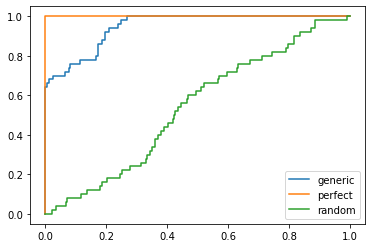

In [21]:
def gen_data_roc(num_ones, num_zeros):
    targets = gen_targets(num_ones, num_zeros)
    predictions = np.concatenate([np.random.uniform(0.5, 1, size=num_ones), np.random.uniform(0, 0.7, size=num_zeros)])
    return targets, predictions

def gen_data_perfect(num_ones, num_zeros):
    targets = gen_targets(num_ones, num_zeros)
    predictions = np.concatenate([np.random.uniform(1, 1, size=num_ones), np.random.uniform(0, 0, size=num_zeros)])
    return targets, predictions

def gen_data_random(num_ones, num_zeros):
    targets = gen_targets(num_ones, num_zeros)
    predictions = np.concatenate([np.random.uniform(0, 1, size=num_ones), np.random.uniform(0, 1, size=num_zeros)])
    return targets, predictions

targets, predictions = gen_data_roc(50, 450)
targets_perf, predictions_perf = gen_data_perfect(50, 450)
targets_rand, predictions_rand = gen_data_random(50, 450)
print(targets[::10], predictions[::10])

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(targets, predictions)
plt.plot(fpr, tpr, label="generic")

fpr, tpr, thresholds = metrics.roc_curve(targets_perf, predictions_perf)
plt.plot(fpr, tpr, label="perfect")

fpr, tpr, thresholds = metrics.roc_curve(targets_rand, predictions_rand)
plt.plot(fpr, tpr, label="random")

plt.legend()

In [22]:
# Notice that better predictor are more leaning towards left and up.
# We can just take area under curve

print("generic", metrics.roc_auc_score(targets, predictions))
print("perfect", metrics.roc_auc_score(targets_perf, predictions_perf))
print("random", metrics.roc_auc_score(targets_rand, predictions_rand))

generic 0.9477777777777777
perfect 1.0
random 0.5371555555555556


#### Task 6

In [23]:
# Task 6:
# Is RoC sensitive to prevalence (number of ones in target)?
# Provide justification.

#### Task 7:

In [24]:
# Task 7:
# You are running fraud detection algorithm for bank transactions.
# Algorithm takes a transaction and outputs probability that it is a fraud.

# Bank regulation of our country say that you should catch 95% of fraudalent transactions.
# Thus, you will select a threshold which catches 95% of frauds, since you have to follow
# the regulation. (i.e. your prediction becomes "probability > threshold")

# Regulation does not care about false positives, that's problem of your customer support.
# But if they get too many cases, they will get pisses and complain to your managers. 
# What metric will you choose to evaluate your fraud detection algorithm? 
# Is roc_auc_score a good metric? If not, give a better metric.